### MapMyRun Data

Import Packages

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

In [2]:
#read the data in from my public github account
temp = pd.read_csv('https://raw.githubusercontent.com/Cbhami/Coraline/master/Netflix%20Project/Data/CONTENT_INTERACTION/ViewingActivity.csv')
temp.head(2)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Dad,2022-05-18 05:21:42,00:54:45,NaN,Ozark: Season 4: Mud (Episode 13),NaN,Amazon FTVET31DOVI2020 Smart TV,00:54:50,00:54:50,US (United States)
1,Dad,2022-05-18 04:31:07,00:50:33,NaN,Ozark: Season 4: Trouble The Water (Episode 12),NaN,Amazon FTVET31DOVI2020 Smart TV,00:50:38,00:50:38,US (United States)


In [3]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45266 entries, 0 to 45265
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Profile Name             45266 non-null  object
 1   Start Time               45266 non-null  object
 2   Duration                 45266 non-null  object
 3   Attributes               12182 non-null  object
 4   Title                    45266 non-null  object
 5   Supplemental Video Type  1006 non-null   object
 6   Device Type              45266 non-null  object
 7   Bookmark                 45266 non-null  object
 8   Latest Bookmark          45266 non-null  object
 9   Country                  45266 non-null  object
dtypes: object(10)
memory usage: 3.5+ MB


In [4]:
# #change my duration times integers
# temp["Minutes"]= temp["Duration"].str.slice(3, 5).astype(int)
# temp["Seconds"] = ((temp["Duration"].str.slice(6, 8)).astype(int) / 60) #* 100
# temp["Duration2"] = temp["Minutes"] + temp["Seconds"]

In [5]:
temp.head(1)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Dad,2022-05-18 05:21:42,00:54:45,NaN,Ozark: Season 4: Mud (Episode 13),NaN,Amazon FTVET31DOVI2020 Smart TV,00:54:50,00:54:50,US (United States)


In [7]:
# #change my watch times to date/time format
df = temp
df['time'] = df['Duration'].apply(lambda x : ''.join(x.split(':', 1)[1:]))
df['percent'] = df['time'].apply(lambda x : x.split(':')[1])
df['percent'] = (df['percent'].astype(int) / 60) * 100
df['percent'] = df['percent'].astype(int)
df['Duration Minutes'] = df['time'].apply(lambda x : str(x).split(':')[0]) + '.' + df['percent'].astype(str)
df.head(1)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,time,percent,Duration Minutes
0,Dad,2022-05-18 05:21:42,00:54:45,NaN,Ozark: Season 4: Mud (Episode 13),NaN,Amazon FTVET31DOVI2020 Smart TV,00:54:50,00:54:50,US (United States),54:45,75,54.75


In [8]:
#temp['Minutes Watched'] = temp['Start Time'].astype(float)
df['Duration Minutes'] = df['Duration Minutes'].astype(float)
df['Start Time'] = pd.to_datetime(df['Start Time'])
df['day_of_week']=df['Start Time'].dt.day_name()
df['Duration'] = pd.to_datetime(df['Duration']).dt.time
df.head(1)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,time,percent,Duration Minutes,day_of_week
0,Dad,2022-05-18 05:21:42,00:54:45,NaN,Ozark: Season 4: Mud (Episode 13),NaN,Amazon FTVET31DOVI2020 Smart TV,00:54:50,00:54:50,US (United States),54:45,75,54.75,Wednesday


In [9]:
df.columns

Index(['Profile Name', 'Start Time', 'Duration', 'Attributes', 'Title',
       'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark',
       'Country', 'time', 'percent', 'Duration Minutes', 'day_of_week'],
      dtype='object')

In [10]:
df = df[['Profile Name', 'Start Time', 'Duration', 'Attributes', 'Title',
       'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark',
       'Country', 'Duration Minutes','day_of_week']]

In [11]:
df['Country'].value_counts()

US (United States)           38436
BE (Belgium)                  4837
DE (Germany)                  1437
MO (Macao)                     135
AU (Australia)                 110
FR (France)                     93
IT (Italy)                      87
GB (United Kingdom)             42
IE (Ireland)                    34
ZZ (Unknown Region)             30
NL (Netherlands)                19
CZ (Czech Republic)              5
SY (Syrian Arab Republic)        1
Name: Country, dtype: int64

In [12]:
df1 = df.loc[df['Country'].isin(['US (United States)', 'BE (Belgium)', 'DE (Germany)', 'FR (France)', 'IT (Italy)', 'NL (Netherlands)', 'IE (Ireland)', 'CZ (Czech Republic)'])]
df1['Country'].value_counts()

US (United States)     38436
BE (Belgium)            4837
DE (Germany)            1437
FR (France)               93
IT (Italy)                87
IE (Ireland)              34
NL (Netherlands)          19
CZ (Czech Republic)        5
Name: Country, dtype: int64

In [13]:
df1.head(1)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Duration Minutes,day_of_week
0,Dad,2022-05-18 05:21:42,00:54:45,NaN,Ozark: Season 4: Mud (Episode 13),NaN,Amazon FTVET31DOVI2020 Smart TV,00:54:50,00:54:50,US (United States),54.75,Wednesday


In [14]:
df1.describe()

,Duration Minutes
count,44948.000000
mean,18.999430
std,13.782307
min,0.000000
25%,6.880000
50%,21.200000
75%,23.410000
max,59.980000


Text(0.5, 1.0, 'Minutes by Country')

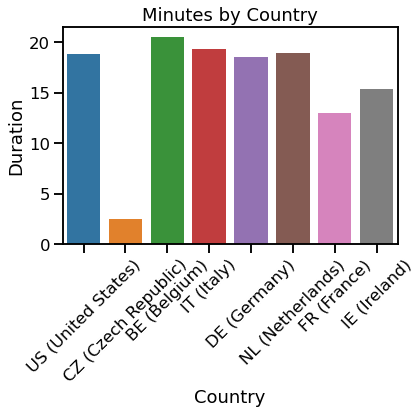

In [15]:
sns.set_context("talk")

sns.barplot(y=('Duration Minutes'), x=
    'Country',
    data=df1, ci=None)

plt.ylabel('Duration')
plt.xlabel('Country')
plt.xticks(rotation = 45)
plt.title('Minutes by Country')

In [16]:
df1.corr()

,Duration Minutes
Duration Minutes,1.0
